This notebook is for Data Wrangling and Cleaning

In [1]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment=None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the main dataset that contains information for each Food Environment Atlas category.

In [2]:
# Importing Dataset
file_food_atlas = 'StateAndCountyData.csv'
data_state_county = pd.read_csv(file_food_atlas)
data_state_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [3]:
data_state_county.dtypes

FIPS               int64
State             object
County            object
Variable_Code     object
Value            float64
dtype: object

In [4]:
data_state_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852810 entries, 0 to 852809
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FIPS           852810 non-null  int64  
 1   State          852810 non-null  object 
 2   County         852810 non-null  object 
 3   Variable_Code  852810 non-null  object 
 4   Value          852810 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.5+ MB


In [5]:
data_state_county.describe()

,FIPS,Value
count,852810.000000,8.528100e+05
mean,30336.233835,1.053919e+04
std,15188.596259,2.148199e+05
min,1.000000,-1.000000e+02
25%,18171.000000,0.000000e+00
50%,29171.000000,3.000000e+00
75%,45069.000000,2.910000e+01
max,56045.000000,3.955704e+07


In [6]:
data_state_county.columns

Index(['FIPS', 'State', 'County', 'Variable_Code', 'Value'], dtype='object')

Importing State Dataset -- This dataset contains supplemental information at the state level

In [7]:
# Importing State Dataset
file_state_data = 'SupplementalDataState.csv'
data_state = pd.read_csv(file_state_data)
data_state.head()

,State_FIPS,State,Variable_Code,Value
0,1,AL,WIC_PART_2012,141899.8333
1,1,AL,WIC_PART_2013,139000.5000
2,1,AL,WIC_PART_2014,131046.2500
3,1,AL,WIC_PART_2015,132132.7500
4,1,AL,WIC_PART_2016,129159.9167


Importing County Dataset -- This dataset contains supplemental information

In [8]:
# Importing County Dataset
file_county_data = 'SupplementalDataCounty.csv'
data_county = pd.read_csv(file_county_data)
data_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga County,2010_Census_Population,54571
1,1001,AL,Autauga County,Population_Estimate_2011,55208
2,1001,AL,Autauga County,Population_Estimate_2012,54936
3,1001,AL,Autauga County,Population_Estimate_2013,54713
4,1001,AL,Autauga County,Population_Estimate_2014,54876


In [9]:
data_county.dtypes

FIPS              int64
State            object
County           object
Variable_Code    object
Value             int64
dtype: object

Importing Variable List -- Might be useful later

In [10]:
file_variables = 'VariableList.csv'
variable_list = pd.read_csv(file_variables)
variable_list.head()

,Variable_Name,Category_Name,Category_Code,Subcategory_Name,Variable_Code,Geography,Units
0,"Population, low access to store, 2010",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP10,CNTY10,Count
1,"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
2,"Population, low access to store (% change), 20...",Access and Proximity to Grocery Store,ACCESS,Overall,PCH_LACCESS_POP_10_15,CNTY10,% change
3,"Population, low access to store (%), 2010",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP10,CNTY10,Percent
4,"Population, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP15,CNTY10,Percent


In [11]:
variable_list.dtypes

Variable_Name       object
Category_Name       object
Category_Code       object
Subcategory_Name    object
Variable_Code       object
Geography           object
Units               object
dtype: object

Filtering the data by the years 2010 and 2015

In [12]:
filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(10|15)$')]

/tmp/ipykernel_45813/3209300512.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(10|15)$')]


In [13]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


Clearing the County and State columns to prevent duplicate values

In [14]:
filtered_df['County'] = filtered_df['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['County'] = filtered_df['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_df['County'] = filtered_df['County'].str.strip() # Remove leading and trailing spaces
filtered_df['County'] = filtered_df['County'].str.lower() # Convert to lowercase

In [15]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,autauga,LACCESS_POP10,18428.439690
1,1001,AL,autauga,LACCESS_POP15,17496.693040
2,1001,AL,autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,autauga,PCT_LACCESS_POP15,32.062255


In [16]:
filtered_df['State'] = filtered_df.loc[:, 'State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['State'] = filtered_df['State'].str.strip() # Remove leading and trailing spaces
filtered_df['State'] = filtered_df['State'].str.upper() # Convert to uppercase

In [17]:
pivot_df = filtered_df.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()

In [18]:
filtered_counties = data_county[data_county['Variable_Code'].str.contains('(10|15)$')]

filtered_counties['County'] = filtered_counties['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_counties['County'] = filtered_counties['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_counties['County'] = filtered_counties['County'].str.strip() # Remove leading and trailing spaces
filtered_counties['County'] = filtered_counties['County'].str.lower() # Convert to lowercase

filtered_counties['State'] = filtered_counties['State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_counties['State'] = filtered_counties['State'].str.strip() # Remove leading and trailing spaces
filtered_counties['State'] = filtered_counties['State'].str.upper() # Convert to lowercase

counties = filtered_counties.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()

/tmp/ipykernel_45813/2238852378.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_counties = data_county[data_county['Variable_Code'].str.contains('(10|15)$')]


In [19]:
counties.head()

Variable_Code,FIPS,State,County,Population_Estimate_2015
0,1001,AL,autauga,54838
1,1003,AL,baldwin,202995
2,1005,AL,barbour,26294
3,1007,AL,bibb,22562
4,1009,AL,blount,57522


In [20]:
counties.isna().sum()

Variable_Code
FIPS                        0
State                       0
County                      0
Population_Estimate_2015    0
dtype: int64

Isolating state totals in a separate dataframe.

In [21]:
state_totals = pivot_df[pivot_df['County']=='total']

In [22]:
state_totals = state_totals.dropna(axis=1, how='all')

In [23]:
state_totals.head()

Variable_Code,FIPS,State,County,CACFP_PART_2015,NSLP_PART_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,1,AL,total,51263.75,5.313053e+05,2.542703e+05,49715.0,4853160.0,1.321328e+05
1,2,AK,total,10786.50,5.361692e+04,2.511123e+04,5850.0,737547.0,1.968200e+04
2,4,AZ,total,42551.50,6.474257e+05,3.087424e+05,14763.0,6833596.0,1.670722e+05
3,5,AR,total,67984.50,3.209214e+05,1.801209e+05,31081.0,2978407.0,8.421958e+04
4,6,CA,total,562667.00,3.271744e+06,1.691159e+06,128025.0,38953142.0,1.265005e+06


In [24]:
state_totals.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2015', 'NSLP_PART_2015',
       'SBP_PART_2015', 'SFSP_PART_2015', 'State_Population_2015',
       'WIC_PART_2015'],
      dtype='object', name='Variable_Code')

Exploring pivot df

Exploring the pivot table

In [25]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2015             float64
CHILDPOVRATE15              float64
                             ...   
Population_Estimate_2015    float64
SBP_PART_2015               float64
SFSP_PART_2015              float64
State_Population_2015       float64
WIC_PART_2015               float64
Length: 72, dtype: object

In [26]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3328 non-null   int64  
 1   State                      3328 non-null   object 
 2   County                     3328 non-null   object 
 3   CACFP_PART_2015            51 non-null     float64
 4   CHILDPOVRATE15             3139 non-null   float64
 5   FARM_TO_SCHOOL15           2925 non-null   float64
 6   FDPIR15                    3143 non-null   float64
 7   LACCESS_BLACK15            3124 non-null   float64
 8   LACCESS_CHILD10            3143 non-null   float64
 9   LACCESS_CHILD15            3124 non-null   float64
 10  LACCESS_CHILD_10_15        3115 non-null   float64
 11  LACCESS_HHNV10             3143 non-null   float64
 12  LACCESS_HHNV15             3140 non-null   float64
 13  LACCESS_HISP15             3124 non-null   float

FIPS, State, and County all have the most non-null values (6334 each).

In [27]:
pivot_df.describe()

Variable_Code,FIPS,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
count,3328.000000,51.000000,3139.000000,2925.000000,3143.000000,3124.000000,3143.000000,3124.000000,3115.000000,3143.000000,...,2854.000000,3143.000000,3143.000000,3141.000000,3139.000000,3.142000e+03,5.100000e+01,51.000000,5.100000e+01,5.100000e+01
mean,29764.681490,81465.823529,23.238738,0.616410,0.159402,2269.428677,4959.224239,4742.980900,277.377250,660.785705,...,7.288870,0.225262,0.112313,0.168418,16.260975,1.020823e+05,2.728003e+05,49691.372549,6.289072e+06,1.536727e+05
std,15635.421817,108545.059263,9.364172,0.486343,0.977978,8793.761183,13169.301375,12216.611681,11060.345777,1121.141847,...,3.713097,0.417822,0.315801,0.374296,6.442319,3.281943e+05,3.570125e+05,66465.618598,7.177506e+06,2.180488e+05
min,1.000000,5581.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01,1.468345e+04,3997.000000,5.856680e+05,1.099542e+04
25%,18110.500000,18939.375000,16.250000,0.000000,0.000000,7.000000,365.133646,354.654348,-11.021858,118.101203,...,5.091226,0.000000,0.000000,0.000000,11.500000,1.094800e+04,7.343671e+04,12752.000000,1.746760e+06,3.905363e+04
50%,29072.000000,49897.500000,22.300000,1.000000,0.000000,86.612488,937.758224,956.123349,-0.048853,320.065422,...,7.302426,0.000000,0.000000,0.000000,15.200000,2.563250e+04,1.850943e+05,33013.000000,4.425999e+06,1.055036e+05
75%,45067.500000,88461.125000,29.100000,1.000000,0.000000,1007.743295,3008.123733,3020.174780,7.263646,706.480605,...,9.393252,0.000000,0.000000,0.000000,19.700000,6.748825e+04,2.937282e+05,61503.500000,6.998570e+06,1.580745e+05
max,56045.000000,562667.000000,61.600000,1.000000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,...,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07,1.902636e+06,438926.000000,3.895314e+07,1.265005e+06


In [28]:
pivot_df.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2015', 'CHILDPOVRATE15',
       'FARM_TO_SCHOOL15', 'FDPIR15', 'LACCESS_BLACK15', 'LACCESS_CHILD10',
       'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'LACCESS_HISP15', 'LACCESS_LOWI10', 'LACCESS_LOWI15',
       'LACCESS_MULTIR15', 'LACCESS_NHASIAN15', 'LACCESS_NHNA15',
       'LACCESS_NHPI15', 'LACCESS_POP10', 'LACCESS_POP15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'LACCESS_SNAP15', 'LACCESS_WHITE15', 'MEDHHINC15',
       'NSLP_PART_2015', 'PCH_FDPIR_12_15', 'PCH_LACCESS_HHNV_10_15',
       'PCH_LACCESS_LOWI_10_15', 'PCH_LACCESS_POP_10_15',
       'PCH_LACCESS_SENIORS_10_15', 'PCT_18YOUNGER10', 'PCT_65OLDER10',
       'PCT_FREE_LUNCH10', 'PCT_FREE_LUNCH15', 'PCT_HISP10',
       'PCT_LACCESS_BLACK15', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15',
       'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_HISP15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_MULTIR15

Finding missing values

In [29]:
pivot_df.isna()

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3324,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3325,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3326,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [30]:
missing_pop15 = pivot_df[pivot_df['Population_Estimate_2015'].isna()]

In [31]:
complete_pop15 = pivot_df[~pivot_df['Population_Estimate_2015'].isna()]

In [32]:
complete_pop15.describe()

Variable_Code,FIPS,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
count,3142.000000,0.0,3007.000000,2811.000000,3008.000000,2991.000000,3008.000000,2991.000000,2984.000000,3008.000000,...,2728.000000,3008.000000,3008.000000,3008.000000,3007.000000,3.142000e+03,0.0,0.0,0.0,0.0
mean,30383.649268,NaN,23.100931,0.620420,0.158245,2185.781425,5026.605428,4803.527469,287.490781,660.368223,...,7.419842,0.218085,0.107048,0.170545,16.146891,1.020823e+05,NaN,NaN,NaN,NaN
std,15162.508374,NaN,9.290579,0.485369,0.984529,8795.888453,13409.291442,12438.100224,11300.162612,1130.967068,...,3.693337,0.413014,0.309226,0.376174,6.385492,3.281943e+05,NaN,NaN,NaN,NaN
min,1001.000000,NaN,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01,NaN,NaN,NaN,NaN
25%,18177.500000,NaN,16.200000,0.000000,0.000000,6.688703,364.415468,353.037120,-11.102732,118.110707,...,5.211623,0.000000,0.000000,0.000000,11.500000,1.094800e+04,NaN,NaN,NaN,NaN
50%,29176.000000,NaN,22.100000,1.000000,0.000000,77.426097,926.074984,945.627194,-0.055063,317.163467,...,7.423936,0.000000,0.000000,0.000000,15.100000,2.563250e+04,NaN,NaN,NaN,NaN
75%,45080.500000,NaN,28.900000,1.000000,0.000000,931.154326,2991.018464,2980.777311,7.028525,702.355623,...,9.499947,0.000000,0.000000,0.000000,19.500000,6.748825e+04,NaN,NaN,NaN,NaN
max,56045.000000,NaN,61.600000,1.000000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,...,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07,NaN,NaN,NaN,NaN


In [33]:
complete_pop15.head()

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
51,1001,AL,autauga,NaN,18.8,0.0,0.0,4216.473194,4822.500269,4616.971480,...,NaN,0.0,0.0,0.0,12.7,54838.0,NaN,NaN,NaN,NaN
52,1003,AL,baldwin,NaN,19.6,1.0,0.0,3540.965826,7916.131932,7007.972675,...,6.346384,0.0,0.0,0.0,12.9,202995.0,NaN,NaN,NaN,NaN
53,1005,AL,barbour,NaN,45.2,0.0,0.0,2713.124930,940.419327,1031.927776,...,2.317528,1.0,1.0,0.0,32.0,26294.0,NaN,NaN,NaN,NaN
54,1007,AL,bibb,NaN,29.3,0.0,0.0,419.099942,249.204753,232.642670,...,9.060807,1.0,0.0,0.0,22.2,22562.0,NaN,NaN,NaN,NaN
55,1009,AL,blount,NaN,22.2,0.0,0.0,95.842687,384.911607,910.686113,...,7.895581,0.0,0.0,0.0,14.7,57522.0,NaN,NaN,NaN,NaN


In [34]:
populations = complete_pop15.groupby("State")["Population_Estimate_2015"].mean()

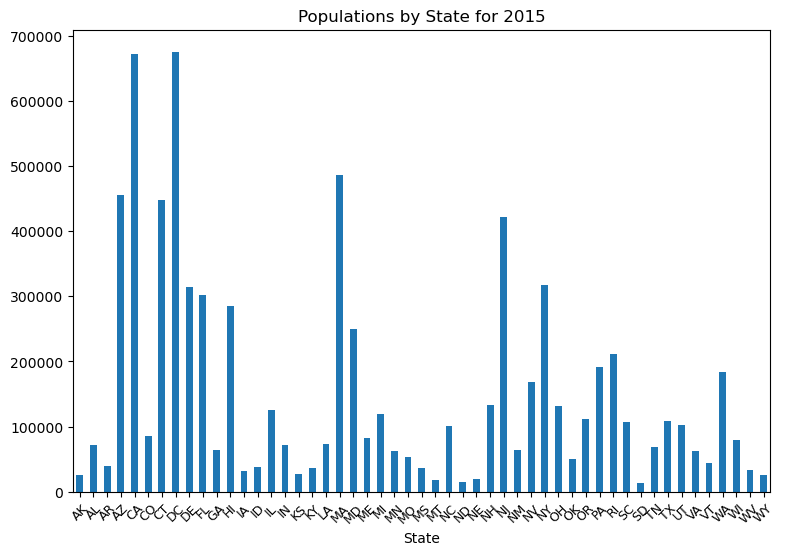

In [35]:
populations.plot(kind="bar", figsize=(9,6), title="Populations by State for 2015")
plt.xticks(rotation=45, fontsize=9)
plt.show()

In [36]:
missing_sum = pivot_df.isnull().sum()
missing_percent = 100 * pivot_df.isnull().mean()
missing = pd.concat([missing_sum, missing_percent], axis=1)
missing = missing.sort_values([0, 1], ascending=False)

In [37]:
missing = missing.rename(columns = {1:'Percent'})
missing = missing.rename(columns = {0:'Sum'})

In [38]:
missing[missing.Percent > 50]

,Sum,Percent
Variable_Code,,
CACFP_PART_2015,3277,98.467548
NSLP_PART_2015,3277,98.467548
SBP_PART_2015,3277,98.467548
SFSP_PART_2015,3277,98.467548
State_Population_2015,3277,98.467548
WIC_PART_2015,3277,98.467548


In [39]:
pivot_df = pivot_df.drop(['CACFP_PART_2015', 'NSLP_PART_2015', 'SBP_PART_2015', 'SFSP_PART_2015', 'State_Population_2015', 'WIC_PART_2015'], axis=1)

In [40]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
PCT_FREE_LUNCH15       474
PCT_REDUCED_LUNCH15    474
FARM_TO_SCHOOL15       403
PCT_REDUCED_LUNCH10    216
LACCESS_CHILD_10_15    213
                      ... 
PCT_HISP10             185
PCT_LACCESS_CHILD10    185
State                    0
County                   0
FIPS                     0
Length: 66, dtype: int64

In [41]:
#pivot_df.info()

In [42]:
pivot_df = pivot_df.drop('PCH_FDPIR_12_15', axis=1) # Drop col. It contains data outside 2010 and 2015

In [43]:
pivot_df['FARM_TO_SCHOOL15'] = pivot_df['FARM_TO_SCHOOL15'].fillna(0)

In [44]:
pivot_df['FARM_TO_SCHOOL15'] = pivot_df['FARM_TO_SCHOOL15'].astype('int')

In [45]:
pivot_df['FARM_TO_SCHOOL15'] = pivot_df['FARM_TO_SCHOOL15'].astype('category')

#categories_farm_to_school = ['No Program', 'Program Exists']
#pivot_df['FARM_TO_SCHOOL15'] = pd.qcut(pivot_df['FARM_TO_SCHOOL15'], q=[0, 1], duplicates='drop')
pivot_df['FARM_TO_SCHOOL15'].sort_values(ascending=False)

2778    1
2712    1
1989    1
1990    1
1991    1
       ..
1317    0
1316    0
1315    0
1314    0
3327    0
Name: FARM_TO_SCHOOL15, Length: 3328, dtype: category
Categories (2, int64): [0, 1]

In [46]:
row_nan_count_method = pivot_df.isnull().sum(axis=1)
#row_nan_count_method.sort_values(ascending=False)
missing_rows = row_nan_count_method[row_nan_count_method > 30]
missing_rows

0       61
1       61
2       61
3       61
4       61
        ..
3130    60
3132    60
3134    60
3136    60
3138    60
Length: 187, dtype: int64

In [47]:
pivot_df[["FIPS", "County", "State", "Population_Estimate_2015"]].sort_values(ascending=False, by="Population_Estimate_2015")

Variable_Code,FIPS,County,State,Population_Estimate_2015
284,6037,los angeles,CA,10097037.0
690,17031,cook,IL,5247662.0
2770,48201,harris,TX,4561939.0
183,4013,maricopa,AZ,4175049.0
302,6073,san diego,CA,3284061.0
...,...,...,...,...
3129,51800,suffolk,VA,NaN
3131,51810,virginia beach,VA,NaN
3133,51820,waynesboro,VA,NaN
3135,51830,williamsburg,VA,NaN


In [48]:
pivot_df["Population_Estimate_2015"].isna().sum()

186

In [49]:
df_condensed = pivot_df # Creating a new dataframe to deal with my condensed data.

In [50]:
df_condensed.dropna(axis=0, thresh=30, inplace=True)

In [51]:
df_condensed.isna().sum(axis=1).sort_values(ascending=False)

3083    34
3062    32
2659    30
1385    28
1111    28
        ..
1145     0
1146     0
1147     0
1148     0
3327     0
Length: 3143, dtype: int64

In [52]:
df_condensed.isna().sum().sort_values(ascending=False)

Variable_Code
PCT_REDUCED_LUNCH15         289
PCT_FREE_LUNCH15            289
Population_Estimate_2015    135
PCT_REDUCED_LUNCH10          31
LACCESS_CHILD_10_15          28
                           ... 
LACCESS_POP10                 0
PCT_LACCESS_CHILD10           0
PCT_LACCESS_LOWI10            0
LACCESS_SENIORS10             0
FIPS                          0
Length: 65, dtype: int64

In [53]:
df_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3143 entries, 51 to 3327
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FIPS                       3143 non-null   int64   
 1   State                      3143 non-null   object  
 2   County                     3143 non-null   object  
 3   CHILDPOVRATE15             3139 non-null   float64 
 4   FARM_TO_SCHOOL15           3143 non-null   category
 5   FDPIR15                    3143 non-null   float64 
 6   LACCESS_BLACK15            3124 non-null   float64 
 7   LACCESS_CHILD10            3143 non-null   float64 
 8   LACCESS_CHILD15            3124 non-null   float64 
 9   LACCESS_CHILD_10_15        3115 non-null   float64 
 10  LACCESS_HHNV10             3143 non-null   float64 
 11  LACCESS_HHNV15             3140 non-null   float64 
 12  LACCESS_HISP15             3124 non-null   float64 
 13  LACCESS_LOWI10             3143 non-n

In [54]:
reduced_dict = df_condensed.groupby("State")["PCT_REDUCED_LUNCH15"].median().to_dict()
df_condensed["PCT_REDUCED_LUNCH15"] = df_condensed["PCT_REDUCED_LUNCH15"].fillna(df_condensed["State"].map(reduced_dict))

In [55]:
free_dict = df_condensed.groupby("State")["PCT_FREE_LUNCH15"].median().to_dict()
df_condensed["PCT_FREE_LUNCH15"] = df_condensed["PCT_FREE_LUNCH15"].fillna(df_condensed["State"].map(free_dict))

In [56]:
df_condensed['PCT_REDUCED_LUNCH15'] = df_condensed['PCT_REDUCED_LUNCH15'].fillna(0)

In [57]:
df_condensed['PCT_FREE_LUNCH15'] = df_condensed['PCT_FREE_LUNCH15'].fillna(0)

In [58]:
reduced10_dict = df_condensed.groupby("State")["PCT_REDUCED_LUNCH10"].median().to_dict()
df_condensed["PCT_REDUCED_LUNCH10"] = df_condensed["PCT_REDUCED_LUNCH10"].fillna(df_condensed["State"].map(reduced10_dict))

In [59]:
df_condensed["PCT_REDUCED_LUNCH10"].isna().sum()

0

In [60]:
laccess_child1015_dict = df_condensed.groupby("State")["LACCESS_CHILD_10_15"].median().to_dict()
df_condensed["LACCESS_CHILD_10_15"] = df_condensed["LACCESS_CHILD_10_15"].fillna(df_condensed["State"].map(laccess_child1015_dict))

In [61]:
df_condensed["LACCESS_CHILD_10_15"].isna().sum()

0

In [62]:
pch_lowi = df_condensed.groupby("State")["PCH_LACCESS_LOWI_10_15"].median().to_dict()
df_condensed["PCH_LACCESS_LOWI_10_15"] = df_condensed["PCH_LACCESS_LOWI_10_15"].fillna(df_condensed["State"].map(pch_lowi))

In [63]:
df_condensed["PCH_LACCESS_LOWI_10_15"].isna().sum()

0

In [64]:
pch_pop = df_condensed.groupby("State")["PCH_LACCESS_POP_10_15"].median().to_dict()
df_condensed["PCH_LACCESS_POP_10_15"] = df_condensed["PCH_LACCESS_POP_10_15"].fillna(df_condensed["State"].map(pch_pop))

In [65]:
df_condensed["PCH_LACCESS_POP_10_15"].isna().sum()

0

In [66]:
pch_senior = df_condensed.groupby("State")["PCH_LACCESS_SENIORS_10_15"].median().to_dict()
df_condensed["PCH_LACCESS_SENIORS_10_15"] = df_condensed["PCH_LACCESS_SENIORS_10_15"].fillna(df_condensed["State"].map(pch_senior))

In [67]:
df_condensed["PCH_LACCESS_SENIORS_10_15"].isna().sum()

0

In [68]:
pct_free = df_condensed.groupby("State")["PCT_FREE_LUNCH10"].median().to_dict()
df_condensed["PCT_FREE_LUNCH10"] = df_condensed["PCT_FREE_LUNCH10"].fillna(df_condensed["State"].map(pct_free))

In [69]:
lowi15 = df_condensed.groupby("State")["LACCESS_LOWI15"].median().to_dict()
df_condensed["LACCESS_LOWI15"] = df_condensed["LACCESS_LOWI15"].fillna(df_condensed["State"].map(lowi15))

In [70]:
def fill_missing(df, col):
    median = df.groupby("State")[col].median().to_dict()
    df[col] = df[col].fillna(df["State"].map(median))
    return df_condensed[col]
fill_missing(df_condensed, "LACCESS_SNAP15")

51      931.935186
52      950.535290
53      422.569040
54       53.818772
55      175.370338
           ...    
3323    352.866113
3324     60.192270
3325    158.918171
3326     36.804973
3327     29.336258
Name: LACCESS_SNAP15, Length: 3143, dtype: float64

In [71]:
df_condensed["LACCESS_SNAP15"].isna().sum()

0

In [72]:
fill_missing(df_condensed, "PCT_LACCESS_SNAP15")
fill_missing(df_condensed, "PCT_LACCESS_LOWI15")
fill_missing(df_condensed, "LACCESS_NHNA15")
fill_missing(df_condensed, "PCT_LACCESS_MULTIR15")
fill_missing(df_condensed, "PCT_LACCESS_CHILD15")
fill_missing(df_condensed, "LACCESS_MULTIR15")
fill_missing(df_condensed, "PCT_LACCESS_BLACK15")
fill_missing(df_condensed, "PCT_LACCESS_NHASIAN15")
fill_missing(df_condensed, "LACCESS_HISP15")
fill_missing(df_condensed, "PCT_LACCESS_NHNA15")
fill_missing(df_condensed, "PCT_LACCESS_NHPI15")
fill_missing(df_condensed, "PCT_LACCESS_POP15")
fill_missing(df_condensed, "LACCESS_NHASIAN15")
fill_missing(df_condensed, "PCT_LACCESS_HISP15")
fill_missing(df_condensed, "LACCESS_WHITE15")
fill_missing(df_condensed, "PCT_LACCESS_SENIORS15")
fill_missing(df_condensed, "LACCESS_SENIORS15")
fill_missing(df_condensed, "LACCESS_POP15")
fill_missing(df_condensed, "LACCESS_NHPI15")
fill_missing(df_condensed, "LACCESS_BLACK15")
fill_missing(df_condensed, "LACCESS_CHILD15")
fill_missing(df_condensed, "PCT_LACCESS_WHITE15")
fill_missing(df_condensed, "PCH_LACCESS_HHNV_10_15")

51        2.025888
52      -11.300383
53        4.678792
54      -18.422377
55        2.050367
           ...    
3323    148.850330
3324    -60.706750
3325    185.641393
3326    203.714261
3327    151.427630
Name: PCH_LACCESS_HHNV_10_15, Length: 3143, dtype: float64

In [73]:
hm = df_condensed.isna().sum().sort_values(ascending=False)

In [74]:
print(hm[hm > 0])

Variable_Code
Population_Estimate_2015    135
POVRATE15                     4
CHILDPOVRATE15                4
MEDHHINC15                    4
PCT_LACCESS_HHNV15            3
LACCESS_HHNV15                3
POPLOSS10                     2
dtype: int64


In [75]:
df_condensed['POVRATE15'] = df_condensed['POVRATE15'].fillna(0)
df_condensed['CHILDPOVRATE15'] = df_condensed['CHILDPOVRATE15'].fillna(0)
df_condensed['PCT_LACCESS_HHNV15'] = df_condensed['PCT_LACCESS_HHNV15'].fillna(0)
df_condensed['LACCESS_HHNV15'] = df_condensed['LACCESS_HHNV15'].fillna(0)

In [76]:
hm = df_condensed.isna().sum().sort_values(ascending=False)

In [77]:
print(hm[hm > 0])

Variable_Code
Population_Estimate_2015    135
MEDHHINC15                    4
POPLOSS10                     2
dtype: int64


In [78]:
fill_missing(df_condensed, "MEDHHINC15")
fill_missing(df_condensed, "POPLOSS10")

51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
       ... 
3323    0.0
3324    0.0
3325    0.0
3326    0.0
3327    0.0
Name: POPLOSS10, Length: 3143, dtype: float64

In [79]:
df_condensed.isna().sum()

Variable_Code
FIPS                          0
State                         0
County                        0
CHILDPOVRATE15                0
FARM_TO_SCHOOL15              0
                           ... 
PERCHLDPOV10                  0
PERPOV10                      0
POPLOSS10                     0
POVRATE15                     0
Population_Estimate_2015    135
Length: 65, dtype: int64

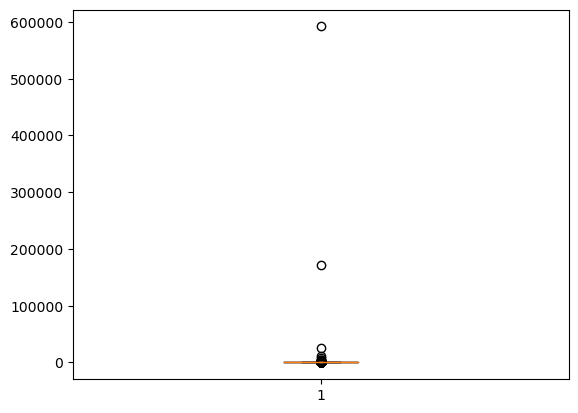

In [80]:
plt.boxplot(df_condensed["LACCESS_CHILD_10_15"])
plt.show()

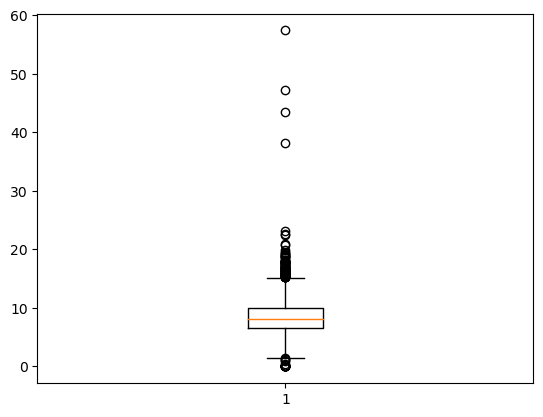

In [81]:
plt.boxplot(df_condensed["PCT_REDUCED_LUNCH10"])
plt.show()

In [82]:
counties

Variable_Code,FIPS,State,County,Population_Estimate_2015
0,1001,AL,autauga,54838
1,1003,AL,baldwin,202995
2,1005,AL,barbour,26294
3,1007,AL,bibb,22562
4,1009,AL,blount,57522
...,...,...,...,...
3137,56037,WY,sweetwater,44754
3138,56039,WY,teton,23016
3139,56041,WY,uinta,20770
3140,56043,WY,washakie,8280


In [83]:
co = counties
co = co.drop(['State','County'], axis=1)
partial = df_condensed
partial = partial.drop("Population_Estimate_2015", axis=1)
df_full = pd.merge(partial, co, on='FIPS')
df_full['Population_Estimate_2015'].isna().sum()

0

In [84]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FIPS                       3140 non-null   int64   
 1   State                      3140 non-null   object  
 2   County                     3140 non-null   object  
 3   CHILDPOVRATE15             3140 non-null   float64 
 4   FARM_TO_SCHOOL15           3140 non-null   category
 5   FDPIR15                    3140 non-null   float64 
 6   LACCESS_BLACK15            3140 non-null   float64 
 7   LACCESS_CHILD10            3140 non-null   float64 
 8   LACCESS_CHILD15            3140 non-null   float64 
 9   LACCESS_CHILD_10_15        3140 non-null   float64 
 10  LACCESS_HHNV10             3140 non-null   float64 
 11  LACCESS_HHNV15             3140 non-null   float64 
 12  LACCESS_HISP15             3140 non-null   float64 
 13  LACCESS_LOWI10             3140 n

In [85]:
#population_dict = df_condensed.groupby("State")["Population_Estimate_2015"].median().to_dict()
#df_condensed["Population_Estimate_2015"] = df_condensed["Population_Estimate_2015"].fillna(df_condensed["State"].map(population_dict))
#df_condensed[['FIPS', 'County', 'State', 'Population_Estimate_2015']]

In [86]:
#df_condensed["Population_Estimate_2015"].isna().sum()

In [87]:
#population_dict

In [88]:
#pop_median = df_condensed["Population_Estimate_2015"].median()
#df_condensed["Population_Estimate_2015"] = df_condensed["Population_Estimate_2015"].fillna(pop_median)
#df_condensed[['FIPS', 'State', 'Population_Estimate_2015']].sort_values(ascending=True, by=['Population_Estimate_2015'])

In [89]:
df_full.isna().sum().sort_values(ascending=False)

Variable_Code
FIPS                         0
PCT_FREE_LUNCH15             0
PCT_LACCESS_BLACK15          0
PCT_LACCESS_CHILD10          0
PCT_LACCESS_CHILD15          0
                            ..
PCH_LACCESS_LOWI_10_15       0
PCH_LACCESS_POP_10_15        0
PCH_LACCESS_SENIORS_10_15    0
PCT_18YOUNGER10              0
Population_Estimate_2015     0
Length: 65, dtype: int64

In [90]:
df_full.head()

Variable_Code,FIPS,State,County,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
0,1001,AL,autauga,18.8,0,0.0,4216.473194,4822.500269,4616.971480,-4.261872,...,0.397647,0.040314,77.246156,6.886107,5.492806,0.0,0.0,0.0,12.7,54838
1,1003,AL,baldwin,19.6,1,0.0,3540.965826,7916.131932,7007.972675,-11.472260,...,0.628755,0.043343,83.504787,5.542340,6.346384,0.0,0.0,0.0,12.9,202995
2,1005,AL,barbour,45.2,0,0.0,2713.124930,940.419327,1031.927776,9.730601,...,0.218524,0.087409,46.753105,4.582140,2.317528,1.0,1.0,0.0,32.0,26294
3,1007,AL,bibb,29.3,0,0.0,419.099942,249.204753,232.642670,-6.645974,...,0.279293,0.030548,75.020729,9.253986,9.060807,1.0,0.0,0.0,22.2,22562
4,1009,AL,blount,22.2,0,0.0,95.842687,384.911607,910.686113,136.596168,...,0.497191,0.031402,88.887338,8.097947,7.895581,0.0,0.0,0.0,14.7,57522


In [91]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FIPS                       3140 non-null   int64   
 1   State                      3140 non-null   object  
 2   County                     3140 non-null   object  
 3   CHILDPOVRATE15             3140 non-null   float64 
 4   FARM_TO_SCHOOL15           3140 non-null   category
 5   FDPIR15                    3140 non-null   float64 
 6   LACCESS_BLACK15            3140 non-null   float64 
 7   LACCESS_CHILD10            3140 non-null   float64 
 8   LACCESS_CHILD15            3140 non-null   float64 
 9   LACCESS_CHILD_10_15        3140 non-null   float64 
 10  LACCESS_HHNV10             3140 non-null   float64 
 11  LACCESS_HHNV15             3140 non-null   float64 
 12  LACCESS_HISP15             3140 non-null   float64 
 13  LACCESS_LOWI10             3140 n

In [92]:
df_full.describe()

Variable_Code,FIPS,CHILDPOVRATE15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,LACCESS_HHNV15,LACCESS_HISP15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03
mean,30387.632484,23.231338,0.157006,2259.975196,4962.448457,4721.790551,275.148527,660.900434,673.258855,2315.081679,...,1.812958,0.080520,78.343850,8.501296,7.011192,0.224841,0.111783,0.168471,16.255796,1.021402e+05
std,15156.372045,9.371860,0.970675,8772.373013,13175.136944,12188.860573,11016.241702,1121.570831,1100.684969,12129.881384,...,7.241848,0.946025,19.805889,3.277897,3.800416,0.417544,0.315150,0.374344,6.447826,3.282909e+05
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.860408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,18178.500000,16.200000,0.000000,7.000000,365.182063,357.517444,-10.797016,118.110707,125.513236,31.157285,...,0.194960,0.010005,66.994751,6.573317,4.912017,0.000000,0.000000,0.000000,11.500000,1.095400e+04
50%,29176.000000,22.300000,0.000000,88.031385,937.561324,951.889339,-0.038024,320.013520,339.534664,133.865260,...,0.304993,0.022943,85.772028,8.119723,7.075466,0.000000,0.000000,0.000000,15.200000,2.564850e+04
75%,45079.500000,29.100000,0.000000,1003.774030,3009.332967,2982.926315,7.006581,706.477808,754.501764,871.943431,...,0.625350,0.046501,94.175301,10.033524,9.187047,0.000000,0.000000,0.000000,19.700000,6.749650e+04
max,56045.000000,61.600000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,13845.220200,263440.500100,...,86.319184,48.888889,99.163180,57.417468,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07


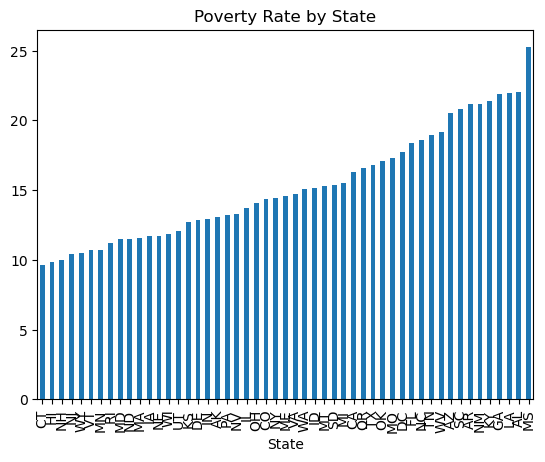

In [93]:
pov_by_state = df_full.groupby("State")["POVRATE15"].mean().sort_values(ascending=True)
pov_by_state.plot(kind="bar", title="Poverty Rate by State")
plt.show()

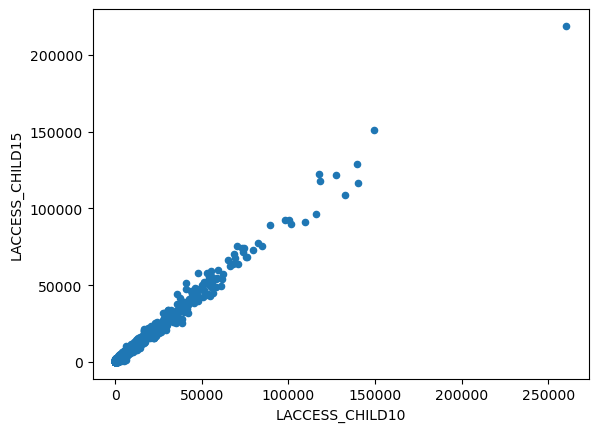

In [94]:
df_full.plot(x="LACCESS_CHILD10", y="LACCESS_CHILD15", kind="scatter")
plt.show()

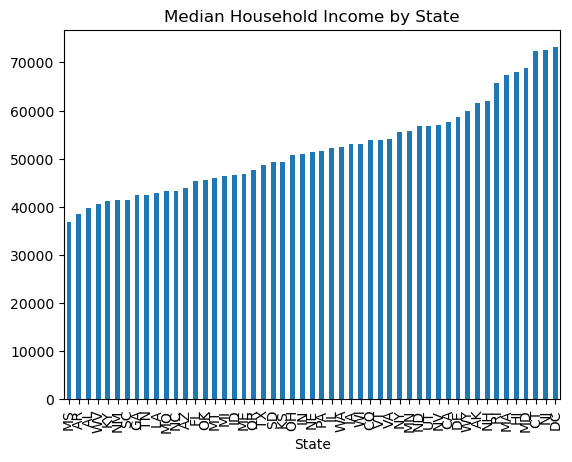

In [95]:
median_income = df_full.groupby("State")["MEDHHINC15"].mean().sort_values(ascending=True)
median_income.plot(kind="bar", title="Median Household Income by State")
plt.show()

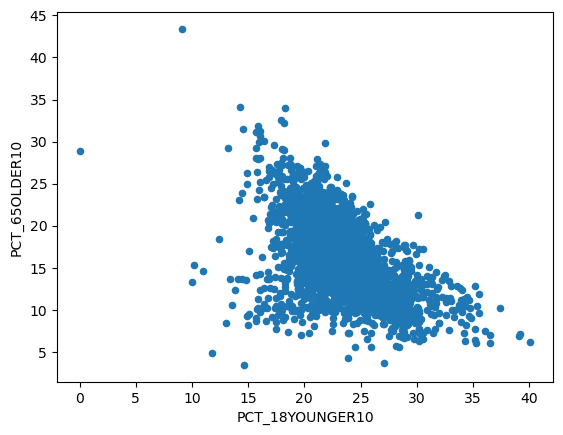

In [96]:
df_full.plot(x="PCT_18YOUNGER10", y="PCT_65OLDER10", kind="scatter")
plt.show()

In [97]:
state_pov_means = df_full.groupby('State')[['PERPOV10', 'PERCHLDPOV10']].mean()
state_pov_means.head()

Variable_Code,PERPOV10,PERCHLDPOV10
State,,
AK,0.035714,0.142857
AL,0.283582,0.492537
AR,0.226667,0.520000
AZ,0.133333,0.466667
CA,0.000000,0.086207


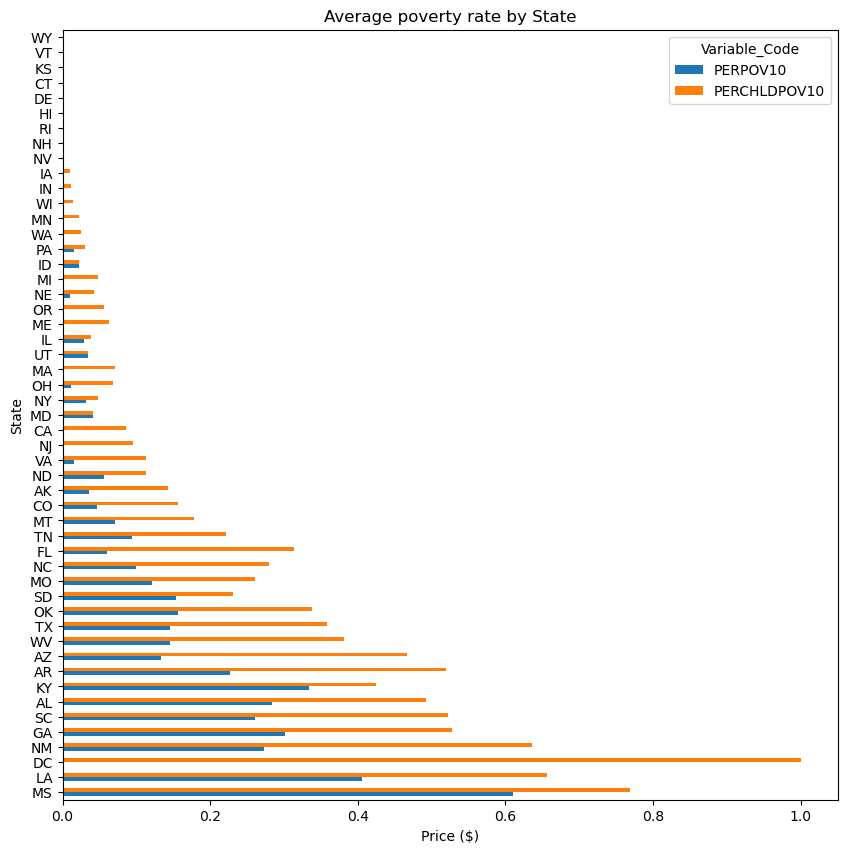

In [98]:
(state_pov_means.reindex(index=state_pov_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average poverty rate by State'))
plt.xlabel('Price ($)');

In [99]:
race_means_15 = df_full.groupby('State')[['PCT_LACCESS_BLACK15', 'PCT_LACCESS_HHNV15','PCT_LACCESS_MULTIR15', 'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_WHITE15']].mean()
race_means_15.head()

Variable_Code,PCT_LACCESS_BLACK15,PCT_LACCESS_HHNV15,PCT_LACCESS_MULTIR15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_WHITE15
State,,,,,
AK,0.517424,15.626172,3.977882,1.587912,21.657649
AL,6.129109,4.633911,0.441023,0.108511,9.409366
AR,4.690150,4.140053,0.852200,0.127928,16.786567
AZ,0.476624,3.732187,3.543934,0.301255,23.471028
CA,0.613848,1.544119,2.569602,0.838045,14.753103


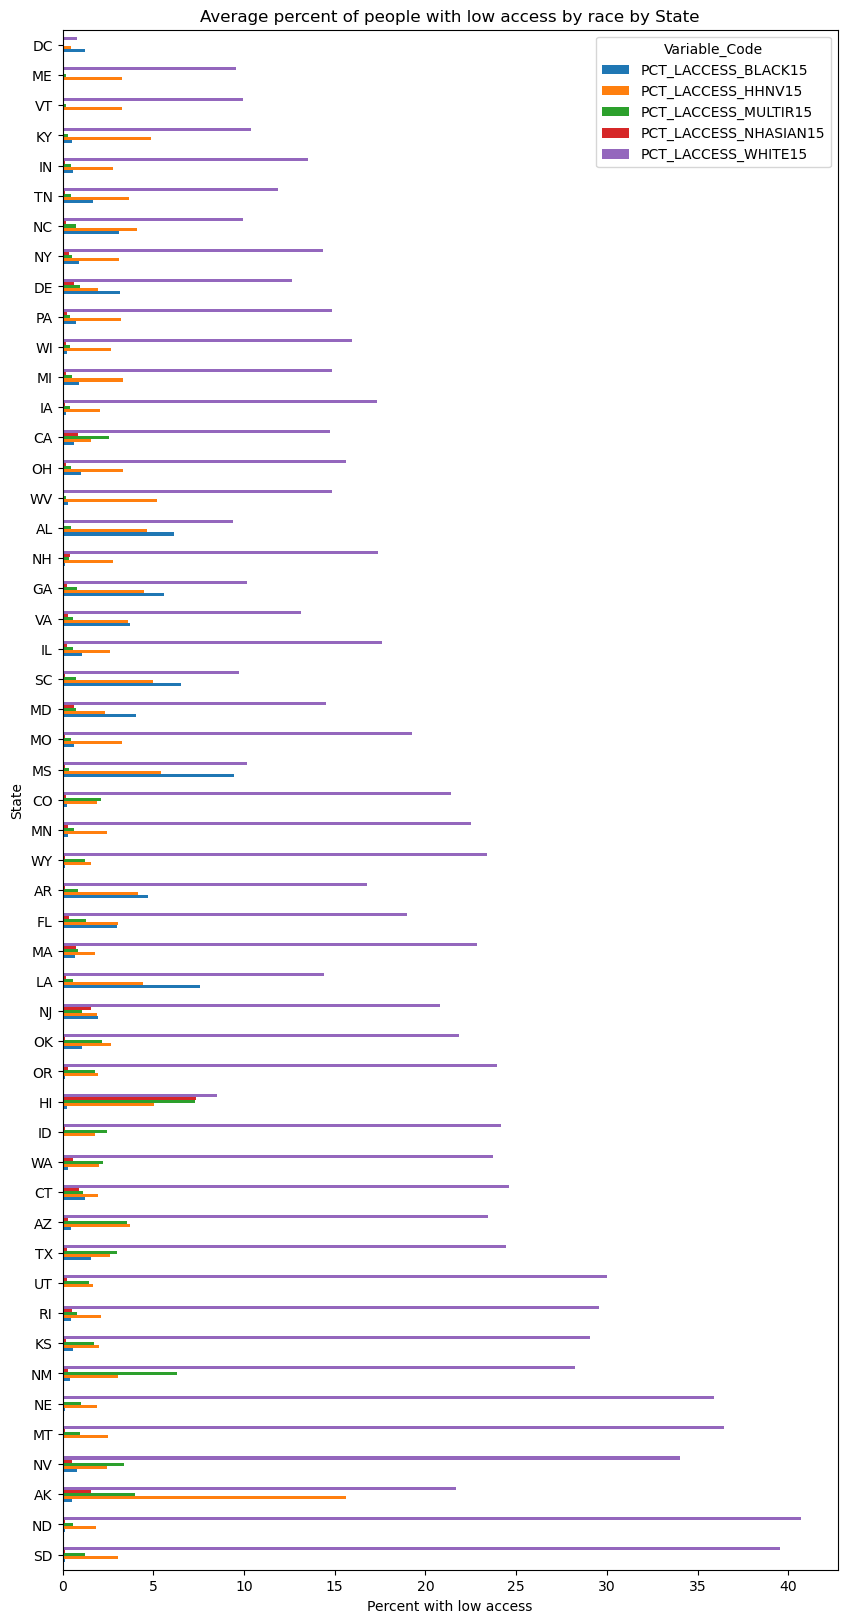

In [100]:
(race_means_15.reindex(index=race_means_15.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
plt.xlabel('Percent with low access');

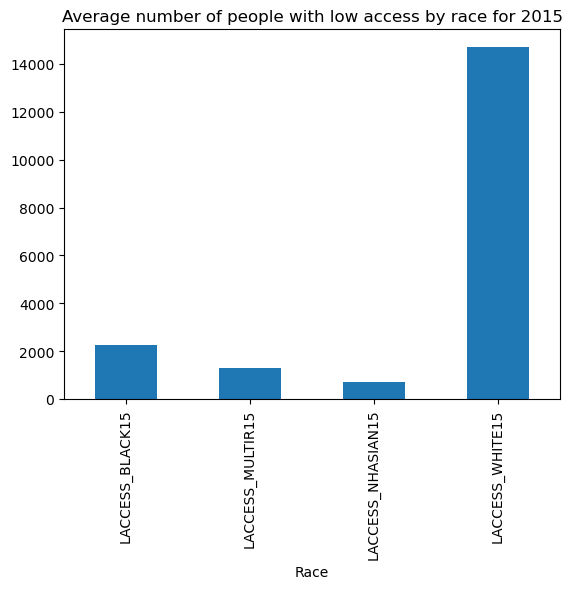

In [113]:
race_means = df_full[['LACCESS_BLACK15', 'LACCESS_MULTIR15', 'LACCESS_NHASIAN15', 'LACCESS_WHITE15']].mean()
race_means.plot(kind="bar", title="Average number of people with low access by race for 2015")
plt.xlabel('Race')
plt.show()

In [102]:
sd_lowaccess = df_full[df_full['State']=='SD'].groupby('County')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
sd_lowaccess.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
County,,,
aurora,2706.276304,2016.246110,2740.0
beadle,3918.715208,3935.360546,18120.0
bennett,3319.803232,3319.803232,3401.0
bon homme,6208.518406,998.050309,6947.0
brookings,13054.722730,12665.293630,33796.0


In [112]:
#(sd_lowaccess.reindex(index=sd_lowaccess.mean(axis=1)
#    .sort_values(ascending=False)
#    .index)
#    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
#plt.xlabel('Percent with low access');

In [104]:
me_lowaccess = df_full[df_full['State']=='ME'].groupby('County')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
me_lowaccess.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
County,,,
androscoggin,12164.627490,12978.324080,107155.0
aroostook,7550.539820,7943.720326,68855.0
cumberland,61015.113470,59726.428460,289544.0
franklin,468.117183,779.482896,30057.0
hancock,3364.161072,2217.662919,54245.0


In [110]:
#(me_lowaccess.reindex(index=me_lowaccess.mean(axis=1)
#    .sort_values(ascending=False)
#    .index)
#    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
#plt.xlabel('Percent with low access');

In [111]:
mo_lowaccess = df_full[df_full['State']=='MO'].groupby('County')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
mo_lowaccess.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
County,,,
adair,4815.458663,4613.814880,25307.0
andrew,2733.463165,1830.110217,17318.0
atchison,297.728028,706.578852,5293.0
audrain,5191.444462,4094.809008,25937.0
barry,2786.654735,3960.032387,35310.0


In [109]:
#(mo_lowaccess.reindex(index=mo_lowaccess.mean(axis=1)
#    .sort_values(ascending=False)
#    .index)
#    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
#plt.xlabel('Percent with low access');